In [39]:
import pandas as pd
import datetime as dt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import scipy
from scipy import stats
from datetime import datetime, timedelta
from matplotlib import dates as mpl_dates

In [40]:
data = pd.read_csv(r"D:\python\3335\untitled\Data\CasesOverTime.csv")

In [41]:
ont_TOTALS.tail(-13)

NameError: name 'ont_TOTALS' is not defined

In [42]:
data.columns

Index(['OBJECTID', 'Province', 'Abbreviation', 'DailyTotals', 'SummaryDate',
       'TotalCases', 'TotalRecovered', 'DailyRecovered', 'TotalDeaths',
       'DailyDeaths', 'TotalTested', 'DailyTested', 'TotalActive',
       'DailyActive'],
      dtype='object')

In [43]:
data["SummaryDate"] = pd.to_datetime(data.SummaryDate)

In [44]:
data["SummaryDate"].dtypes

datetime64[ns, UTC]

In [45]:
data['Month'] = data.SummaryDate.dt.month_name()
gk = data.groupby("Province")
date_gk = data.groupby(data["Month"])
ont_gk = gk.get_group('ONTARIO')
get_month = date_gk.get_group("January")
ont_TOTALS = data.groupby(ont_gk.TotalCases).sum()


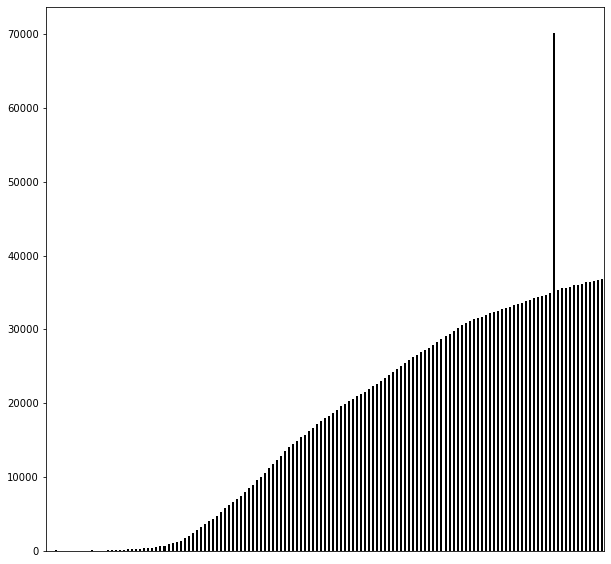

In [46]:
ont_TOTALS["TotalCases"].plot(kind='bar',color='black' , figsize=(10,10))
plt.gca().axes.get_xaxis().set_visible(False)

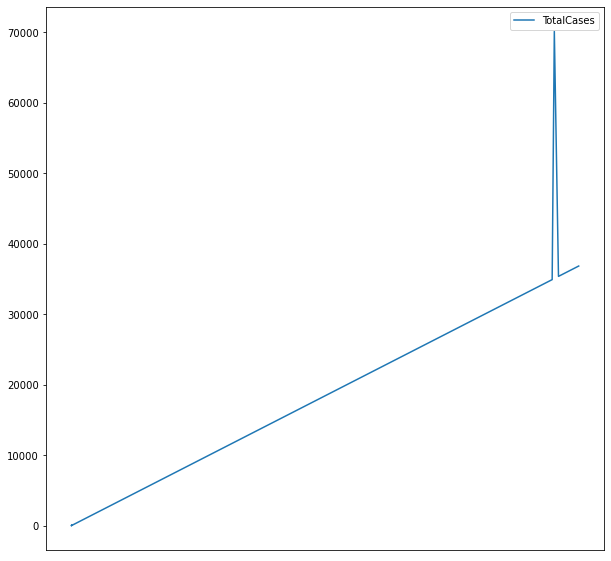

In [47]:
ont_TOTALS.plot(kind="line", y="TotalCases", figsize=(10,10))
plt.gca().axes.get_xaxis().set_visible(False)

In [48]:
data['z_score']=stats.zscore(data['TotalCases'])

In [49]:
data['z_score']

0      -0.364811
1      -0.364811
2      -0.364811
3      -0.364811
4      -0.364811
          ...   
1871   -0.363823
1872   -0.363823
1873   -0.363823
1874   -0.363823
1875   -0.363823
Name: z_score, Length: 1876, dtype: float64

In [50]:
data.loc[data['z_score'].abs()<=3]

,OBJECTID,Province,Abbreviation,DailyTotals,SummaryDate,TotalCases,TotalRecovered,DailyRecovered,TotalDeaths,DailyDeaths,TotalTested,DailyTested,TotalActive,DailyActive,Month,z_score
0,1,ALBERTA,AB,0,2020-01-25 12:00:00+00:00,0,0,0,0,0,0,0,0,0.0,January,-0.364811
1,25,ALBERTA,AB,0,2020-01-26 12:00:00+00:00,0,0,0,0,0,0,0,0,0.0,January,-0.364811
2,36,ALBERTA,AB,0,2020-01-27 12:00:00+00:00,0,0,0,0,0,0,0,0,0.0,January,-0.364811
3,54,ALBERTA,AB,0,2020-01-28 12:00:00+00:00,0,0,0,0,0,0,0,0,0.0,January,-0.364811
4,69,ALBERTA,AB,0,2020-01-29 12:00:00+00:00,0,0,0,0,0,0,0,0,0.0,January,-0.364811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1871,2668,YUKON,YT,0,2020-07-09 12:00:00+00:00,11,11,0,0,0,1322,5,0,0.0,July,-0.363823
1872,2683,YUKON,YT,0,2020-07-10 12:00:00+00:00,11,11,0,0,0,1327,5,0,0.0,July,-0.363823
1873,2698,YUKON,YT,0,2020-07-11 12:00:00+00:00,11,11,0,0,0,1327,0,0,0.0,July,-0.363823
1874,2713,YUKON,YT,0,2020-07-12 12:00:00+00:00,11,11,0,0,0,1327,0,0,0.0,July,-0.363823


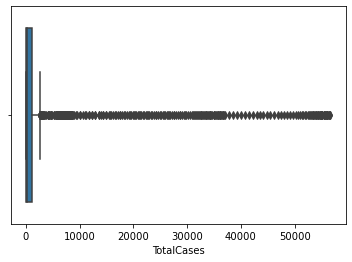

In [51]:
sns.boxplot(x=data['TotalCases'])

In [52]:
gk2 = data.groupby("Province")

In [53]:
date_gk2 = data.groupby(data["Month"])

In [54]:
date_gk2.Month.value_counts()

Month     Month   
April     April       358
February  February    232
January   January      56
July      July        169
June      June        390
March     March       268
May       May         403
Name: Month, dtype: int64

In [55]:
data.columns

Index(['OBJECTID', 'Province', 'Abbreviation', 'DailyTotals', 'SummaryDate',
       'TotalCases', 'TotalRecovered', 'DailyRecovered', 'TotalDeaths',
       'DailyDeaths', 'TotalTested', 'DailyTested', 'TotalActive',
       'DailyActive', 'Month', 'z_score'],
      dtype='object')

In [56]:
province_filter = data.loc[:,'Province']

In [57]:
ont_data = data[province_filter=='ONTARIO']

In [58]:
gr2 = ont_data.groupby(data['Month'])

Month
April       AxesSubplot(0.125,0.125;0.775x0.755)
February    AxesSubplot(0.125,0.125;0.775x0.755)
January     AxesSubplot(0.125,0.125;0.775x0.755)
July        AxesSubplot(0.125,0.125;0.775x0.755)
June        AxesSubplot(0.125,0.125;0.775x0.755)
March       AxesSubplot(0.125,0.125;0.775x0.755)
May         AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

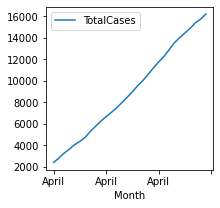

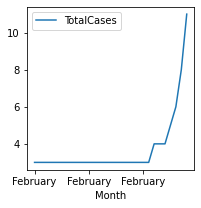

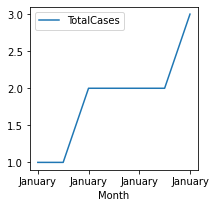

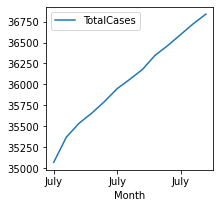

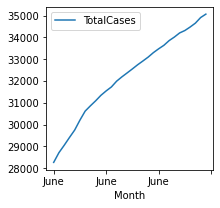

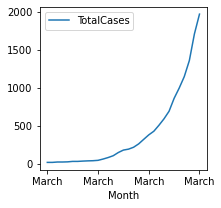

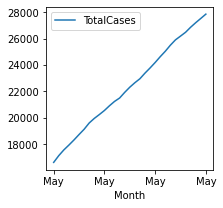

In [59]:
gr2.plot(x= "Month", y="TotalCases",kind="line",figsize=(3,3))

In [ ]:
fig,ax =plt.subplots()
gr2.plot(x= "Month", y="TotalCases",ax=ax,legend=False)

Month
April       AxesSubplot(0.125,0.125;0.775x0.755)
February    AxesSubplot(0.125,0.125;0.775x0.755)
January     AxesSubplot(0.125,0.125;0.775x0.755)
July        AxesSubplot(0.125,0.125;0.775x0.755)
June        AxesSubplot(0.125,0.125;0.775x0.755)
March       AxesSubplot(0.125,0.125;0.775x0.755)
May         AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

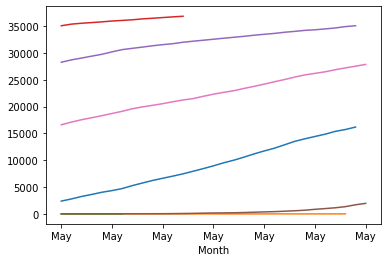

In [61]:
data.columns

In [19]:
data.columns

Index(['OBJECTID', 'Province', 'Abbreviation', 'DailyTotals', 'SummaryDate',
       'TotalCases', 'TotalRecovered', 'DailyRecovered', 'TotalDeaths',
       'DailyDeaths', 'TotalTested', 'DailyTested', 'TotalActive',
       'DailyActive', 'z_score'],
      dtype='object')

In [20]:
boolean = []
for Province in data.Province:
    if Province =="ONTARIO":
        boolean.append(True)
    else:
        boolean.append(False)
        
        

In [21]:
is_ont = pd.Series(boolean)

In [22]:
ont_filter = data[is_ont]

In [23]:
data.dtypes

OBJECTID            int64
Province           object
Abbreviation       object
DailyTotals         int64
SummaryDate        object
TotalCases          int64
TotalRecovered      int64
DailyRecovered      int64
TotalDeaths         int64
DailyDeaths         int64
TotalTested         int64
DailyTested         int64
TotalActive         int64
DailyActive       float64
z_score           float64
dtype: object

In [24]:
prov=data.groupby("Province")

In [25]:
prov.get_group("ONTARIO")

,OBJECTID,Province,Abbreviation,DailyTotals,SummaryDate,TotalCases,TotalRecovered,DailyRecovered,TotalDeaths,DailyDeaths,TotalTested,DailyTested,TotalActive,DailyActive,z_score
1143,6,ONTARIO,ON,1,2020/01/25 12:00:00+00,1,0,0,0,0,0,0,1,1.0,-0.364721
1144,17,ONTARIO,ON,0,2020/01/26 12:00:00+00,1,0,0,0,0,0,0,1,0.0,-0.364721
1145,31,ONTARIO,ON,1,2020/01/27 12:00:00+00,2,0,0,0,0,0,0,2,1.0,-0.364632
1146,43,ONTARIO,ON,0,2020/01/28 12:00:00+00,2,0,0,0,0,0,0,2,0.0,-0.364632
1147,58,ONTARIO,ON,0,2020/01/29 12:00:00+00,2,0,0,0,0,0,0,2,0.0,-0.364632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1309,2678,ONTARIO,ON,170,2020/07/09 12:00:00+00,36348,31977,172,2703,3,1608687,26326,1668,-5.0,2.899480
1310,2693,ONTARIO,ON,116,2020/07/10 12:00:00+00,36464,32155,178,2710,7,1636171,27484,1599,-69.0,2.909897
1311,2708,ONTARIO,ON,130,2020/07/11 12:00:00+00,36594,32422,267,2716,6,1665693,29522,1456,-143.0,2.921572
1312,2723,ONTARIO,ON,129,2020/07/12 12:00:00+00,36723,32534,112,2719,3,1691419,25726,1470,14.0,2.933157


In [26]:
max_prov =prov.get_group("ALBERTA").max()

In [27]:
max_prov

OBJECTID                            2735
Province                         ALBERTA
Abbreviation                          AB
DailyTotals                          319
SummaryDate       2020/07/13 12:00:00+00
TotalCases                          8826
TotalRecovered                      7989
DailyRecovered                       335
TotalDeaths                          161
DailyDeaths                            9
TotalTested                       540102
DailyTested                        25132
TotalActive                         3125
DailyActive                          270
z_score                         0.427822
dtype: object

In [28]:
check = pd.DataFrame(data.groupby(['Province', data['Month']])["TotalCases","TotalRecovered","TotalDeaths"].max()).reset_index(drop=False)

KeyError: 'Month'

In [29]:
check

NameError: name 'check' is not defined

In [30]:
check.sort_values(by=['Province','Month',"TotalCases","TotalRecovered","TotalDeaths"],ascending=True)

NameError: name 'check' is not defined

In [31]:
def plot_bar(feature, value, title, df, size):
    f, ax = plt.subplots(1,1, figsize=(2*size,7))
    df = df.sort_values([value], ascending=False).reset_index(drop=True)
    g = sns.barplot(df[feature][0:], df[value][0:], palette='Set2')
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    plt.ylim(0,55000)
    plt.show()

In [32]:
filtered_set = check.drop_duplicates(subset = ['TotalCases'])

NameError: name 'check' is not defined

In [33]:
plot_bar('Province', 'TotalCases','Total cases', filtered_set, size=10)

NameError: name 'filtered_set' is not defined

In [34]:
plot_bar('Province', 'TotalCases','Total cases', check, size=10)

NameError: name 'check' is not defined

In [35]:
data.isnull().sum()

OBJECTID          0
Province          0
Abbreviation      0
DailyTotals       0
SummaryDate       0
TotalCases        0
TotalRecovered    0
DailyRecovered    0
TotalDeaths       0
DailyDeaths       0
TotalTested       0
DailyTested       0
TotalActive       0
DailyActive       4
z_score           0
dtype: int64